# Exploratory Data Analysis

## Exploration of Individual Variables

In [43]:
# import library 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

# import dataset 
data = pd.read_csv('breast_cancer.csv')
data = data.drop(['Unnamed: 32','id'], axis=1) # run only ONCE

In [2]:
# look at what the dataset looks like
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# general overview of the response variable

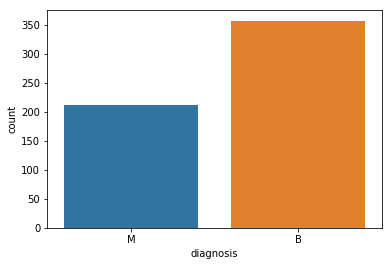

In [7]:
# Classficiation Label - diagnosis 
predictor = sns.countplot(data.diagnosis, label="Count of Malignant and Benign Tumors")

# correlation plot

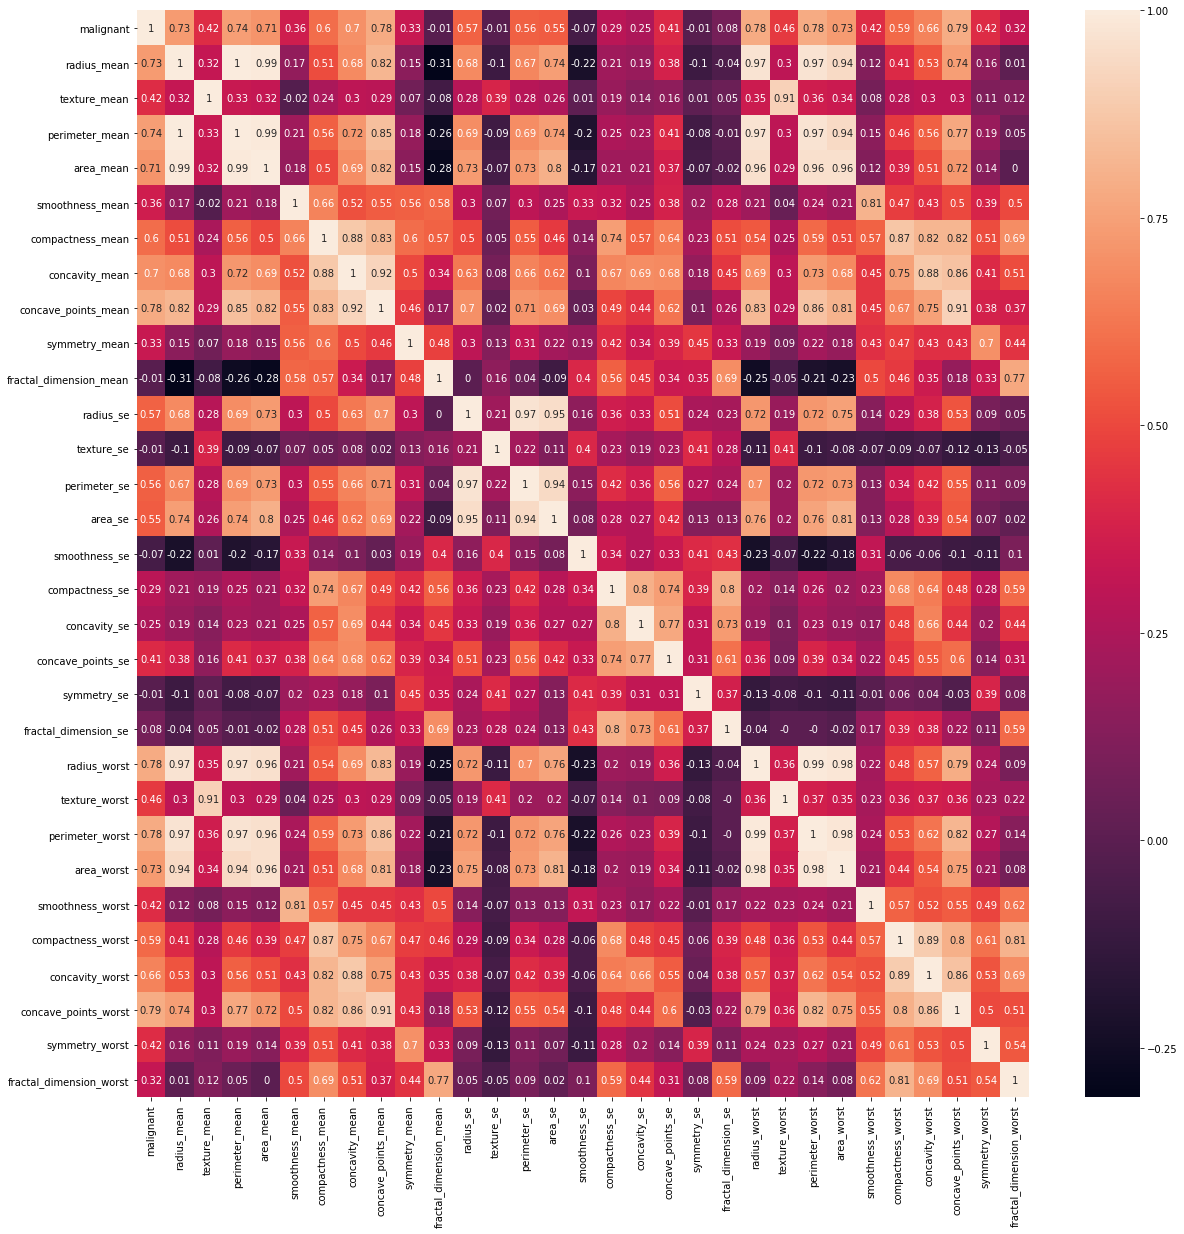

In [28]:
data.loc[(data['diagnosis'] == 'M'), 'diagnosis'] = 1
data.loc[(data['diagnosis'] == 'B'), 'diagnosis'] = 0
data.rename(columns={'diagnosis':'malignant'}, inplace=True)
# correlation matrix
import seaborn as sns
correlation_matrix = data.corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize = (20,20))
sns.heatmap(data=correlation_matrix, annot=True)

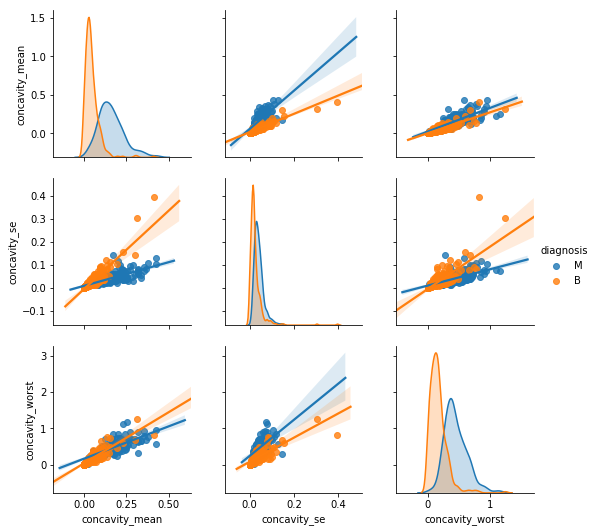

In [9]:
# Concavity 
concavity = data.loc[:,('diagnosis','concavity_mean', 'concavity_se', 'concavity_worst')]
concavity_plot = sns.pairplot(concavity, hue='diagnosis', kind='reg')

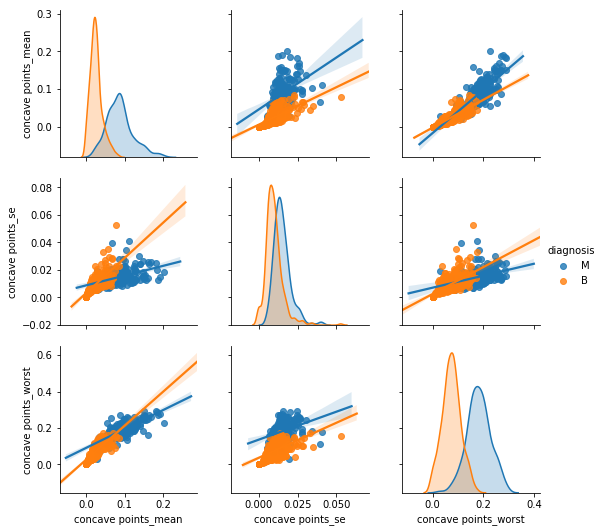

In [10]:
concavepoints = data.loc[:,('diagnosis','concave points_mean', 'concave points_se', 'concave points_worst')]
concavepoints_plot = sns.pairplot(concavepoints, hue='diagnosis', kind='reg')

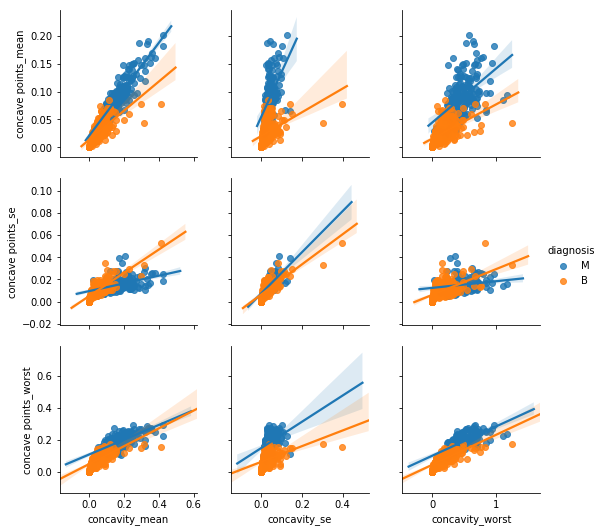

In [11]:
# Concavity vs Concave points 
sns.pairplot(data, x_vars=['concavity_mean','concavity_se','concavity_worst'], 
             y_vars=['concave points_mean','concave points_se','concave points_worst'], 
             hue='diagnosis', kind='reg') 

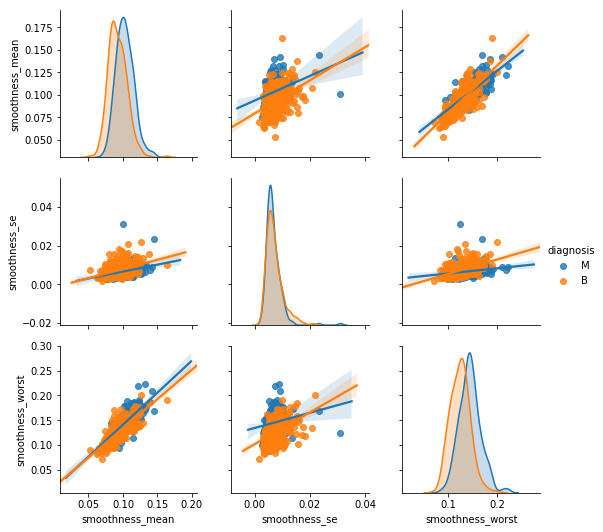

In [12]:
# Smoothness
smoothness = data.loc[:,('diagnosis','smoothness_mean', 'smoothness_se', 'smoothness_worst')]
smoothness_plot = sns.pairplot(smoothness, hue='diagnosis', kind='reg')

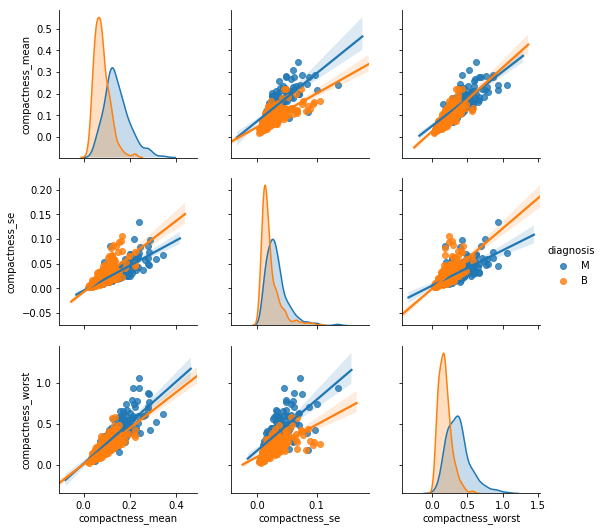

In [13]:
#Compactness
compactness= data.loc[:,('diagnosis','compactness_mean', 'compactness_se', 'compactness_worst')]
compactness_plot = sns.pairplot(compactness, hue='diagnosis', kind='reg')


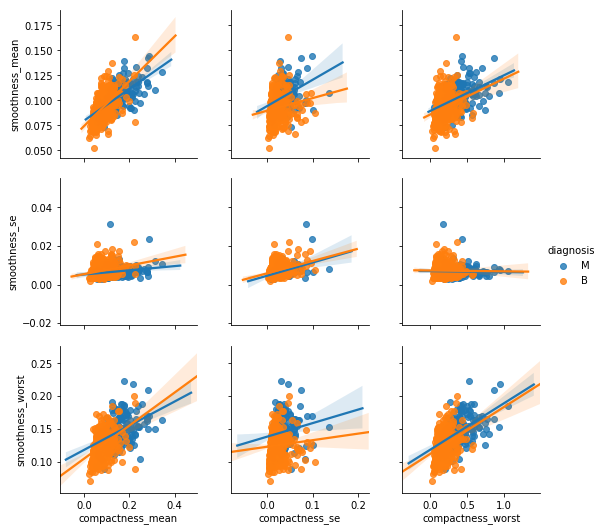

In [14]:
# Smothness VS Compactness 
sns.pairplot(data, x_vars=['compactness_mean','compactness_se','compactness_worst'], 
             y_vars=['smoothness_mean','smoothness_se','smoothness_worst'], 
             hue='diagnosis', kind='reg')

In [15]:
data.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


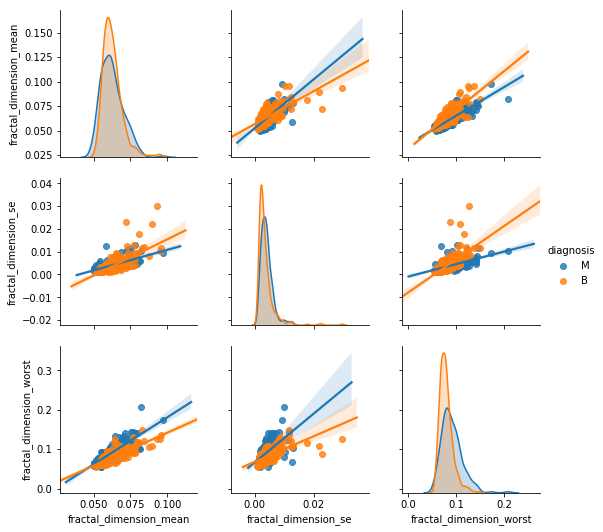

In [19]:
#DIMENSION
dimension=data[["diagnosis","fractal_dimension_mean","fractal_dimension_se","fractal_dimension_worst"]]
dimension_plot = sns.pairplot(dimension, hue='diagnosis', kind='reg')

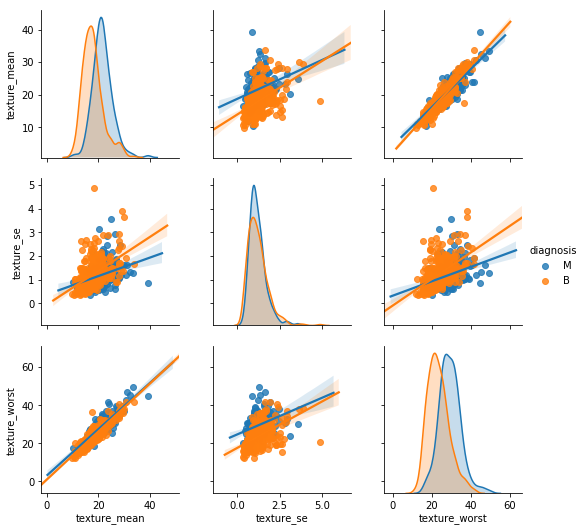

In [20]:
#texture 
texture=data[["diagnosis","texture_mean","texture_se","texture_worst"]]
texture.head()
sns.pairplot(texture,hue='diagnosis', kind='reg')

# radius

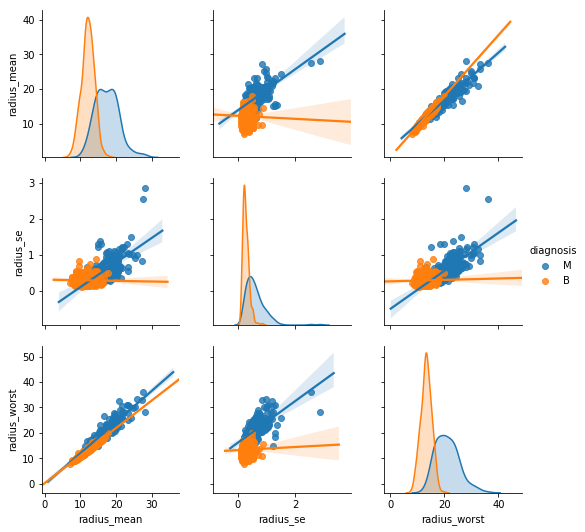

In [25]:
radius = data.loc[:,('diagnosis','radius_mean', 'radius_se', 'radius_worst')]
radius_plot = sns.pairplot(radius, hue='diagnosis', kind='reg')

# predictor: perimeter

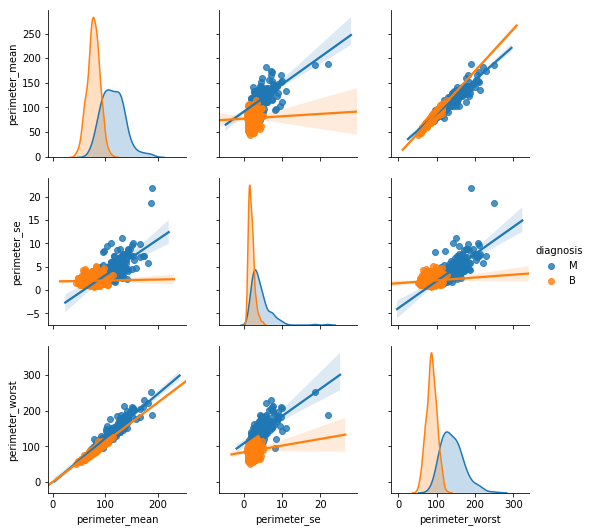

In [26]:
perimeter = data.loc[:,('diagnosis','perimeter_mean', 'perimeter_se', 'perimeter_worst')]
perimeter_plot = sns.pairplot(perimeter, hue='diagnosis', kind='reg')

# predictor area

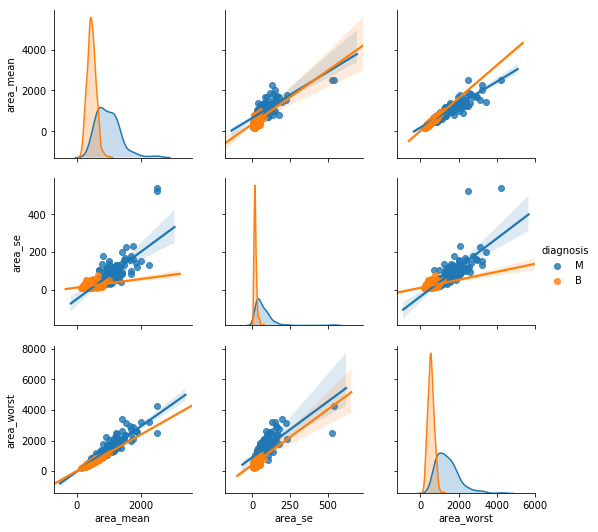

In [27]:
area = data.loc[:,('diagnosis','area_mean', 'area_se', 'area_worst')]
area_plot = sns.pairplot(area, hue='diagnosis', kind='reg')

## Data Modeling Logistic Regression

## Model Selection 


# model 1

In [44]:
#rename the columns
data.columns=['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave_points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

In [45]:
X= data.loc[:,['compactness_se','compactness_worst','smoothness_worst',
            'concavity_mean','concave_points_mean','concave_points_worst','symmetry_mean',
            'symmetry_worst','texture_worst','radius_mean','radius_se','area_worst',
            'area_se','perimeter_se']]

Y = data.iloc[:, 0].values 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size = 0.7, 
                                                    random_state = 131)

# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [46]:
formula='Y~'+'+'.join(X.columns)

In [47]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = smf.glm(formula = formula,data=data,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['Y[B]', 'Y[M]']   No. Observations:                  569
Model:                            GLM   Df Residuals:                      554
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -25.967
Date:                Sun, 13 Oct 2019   Deviance:                       51.934
Time:                        20:45:39   Pearson chi2:                     194.
No. Iterations:                    11   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               26.9409     12.362      2.179      0.029       2.712      51.169
compactness_se        

In [34]:
Y_pred = logistic_regression.predict(X_test)

from sklearn.metrics import confusion_matrix
logistic_regression_cm = confusion_matrix(Y_test, Y_pred)
logistic_regression_cm

array([[113,   0],
       [  2,  56]])

In [35]:
data=result.resid_pearson

In [36]:
sum(result.resid_pearson>3)
sum(result.resid_pearson<-3)

0

In [37]:
x=data.reset_index()['index']
y=data.reset_index()[0]

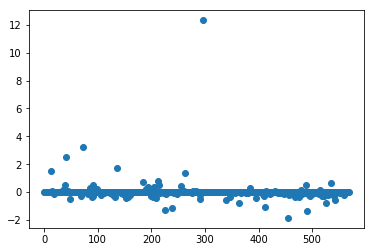

In [38]:
plt.scatter(x,y)

In [39]:
result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                           chi2                 P>chi2  df constraint
Intercept              4.749717   0.029303114913989636              1
compactness_se         5.611053    0.01784753916599251              1
compactness_worst      0.388583      0.533045158983026              1
smoothness_worst       1.352104    0.24491059473420757              1
concavity_mean         1.665173    0.19690625882466714              1
concave_points_mean    1.302070      0.253835460800905              1
concave_points_worst   4.394566    0.03605364311459822              1
symmetry_mean          2.130858    0.14435990971526946              1
symmetry_worst         5.869507   0.015405366859052232              1
texture_worst         15.336518  8.996058584188054e-05              1
radius_mean            2.417956    0.11995138609497182              1
radius_se              0.176548     0.6743569676222847              1
area_worst             4.634525   0.0

In [40]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
carsnew2=X
vif["VIF Factor"] = [variance_inflation_factor(carsnew2.values, i) for i in range(carsnew2.shape[1])]
vif["features"] = carsnew2.columns
print(vif)

    VIF Factor              features
0    11.366835        compactness_se
1    25.416729     compactness_worst
2    52.162463      smoothness_worst
3    28.483713        concavity_mean
4    50.056969   concave_points_mean
5    52.075131  concave_points_worst
6   122.519401         symmetry_mean
7    77.370182        symmetry_worst
8    23.086622         texture_worst
9    89.116680           radius_mean
10   90.375186             radius_se
11   48.347607            area_worst
12   30.580103               area_se
13   74.112020          perimeter_se


# model 2: drop the insignificant variables

In [4]:
X = data.loc[:,['compactness_se','smoothness_worst',
           'concavity_mean','concave_points_worst',
           'symmetry_worst','texture_worst','area_worst',
           'area_se']]
Y = data.iloc[:, 0].values
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size = 0.7,
                                                   random_state = 131)
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [5]:
formula='Y~'+'+'.join(X.columns)

In [15]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = smf.glm(formula = formula,data=data,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['Y[B]', 'Y[M]']   No. Observations:                  569
Model:                            GLM   Df Residuals:                      560
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -28.297
Date:                Sun, 13 Oct 2019   Deviance:                       56.594
Time:                        20:09:45   Pearson chi2:                     557.
No. Iterations:                    11   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               44.0223      8.590      5.125      0.000      27.186      60.859
compactness_se        

In [16]:
Y_pred = logistic_regression.predict(X_test)

from sklearn.metrics import confusion_matrix
logistic_regression_cm = confusion_matrix(Y_test, Y_pred)
logistic_regression_cm

array([[112,   1],
       [  2,  56]])

In [17]:
data=result.resid_pearson
x=data.reset_index()['index']
y=data.reset_index()[0]

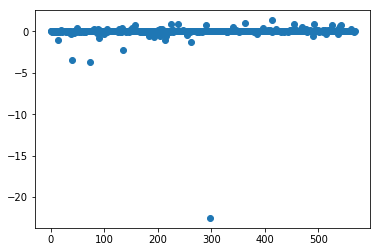

In [18]:
plt.scatter(x,y)

In [12]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
carsnew2=X
vif["VIF Factor"] = [variance_inflation_factor(carsnew2.values, i) for i in range(carsnew2.shape[1])]
vif["features"] = carsnew2.columns
print(vif)

   VIF Factor              features
0    6.702890        compactness_se
1   35.467837      smoothness_worst
2   14.800776        concavity_mean
3   28.170843  concave_points_worst
4   31.424279        symmetry_worst
5   19.985729         texture_worst
6   21.747639            area_worst
7    6.948777               area_se


In [20]:
sum(result.resid_pearson>3)
sum(result.resid_pearson<-3)

3

In [14]:
result.wald_test_terms()

<class 'statsmodels.stats.contrast.WaldTestResults'>
                           chi2                  P>chi2  df constraint
Intercept             26.262730  2.9798415023963414e-07              1
compactness_se        10.002112   0.0015636081609297148              1
smoothness_worst       5.251305     0.02193032072536424              1
concavity_mean         5.356034     0.02065068915246411              1
concave_points_worst   5.638452     0.01757071438669435              1
symmetry_worst         5.865433    0.015441063360072657              1
texture_worst         20.058042   7.512692944778914e-06              1
area_worst            14.980315   0.0001086385796054528              1
area_se               14.547109  0.00013669825257293182              1

# model 3

In [24]:
X = data.loc[:,['compactness_se','concave_points_worst',
           'symmetry_worst','texture_worst','area_worst']]
Y = data.iloc[:, 0].values 
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, train_size = 0.7, 
                                                    random_state = 131)

# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [25]:
formula='Y~'+'+'.join(X.columns)

In [26]:
import statsmodels.formula.api as smf
import statsmodels.api as sm
model = smf.glm(formula = formula,data=data,family=sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:       ['Y[B]', 'Y[M]']   No. Observations:                  569
Model:                            GLM   Df Residuals:                      563
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -47.574
Date:                Sun, 13 Oct 2019   Deviance:                       95.148
Time:                        20:14:25   Pearson chi2:                 4.32e+03
No. Iterations:                     9   Covariance Type:             nonrobust
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               25.4707      3.463      7.356      0.000      18.684      32.258
compactness_se        

In [27]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
carsnew2=X
vif["VIF Factor"] = [variance_inflation_factor(carsnew2.values, i) for i in range(carsnew2.shape[1])]
vif["features"] = carsnew2.columns
print(vif)

   VIF Factor              features
0    4.181681        compactness_se
1   14.259111  concave_points_worst
2   17.049664        symmetry_worst
3   15.586078         texture_worst
4    8.799180            area_worst
